In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (1)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/archive (1)/Apple_scab/Scab (107).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (106).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (102).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (105).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (101).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (100).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (103).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (1).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (10).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (104).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (118).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (113).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (109).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (115).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (12).JPG
/content/drive/MyDrive/archive (1)/Apple_scab/Scab (11).JPG
/content/drive/MyDrive/archiv

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
DATASET="/content/drive/MyDrive/archive (1)"
for file in os.listdir(DATASET):
    print(file)

Apple_scab
Apple_black_rot
Apple_cedar_rust


In [ ]:
CLASS_list = ['Apple_cedar_rust','Apple_black_rot','Apple_scab']
CLASS_list

['Apple_cedar_rust', 'Apple_black_rot', 'Apple_scab']

In [ ]:
DATASET = "//content/drive/MyDrive/archive (1)"

print(len(os.listdir(os.path.join(DATASET, 'Apple_cedar_rust'))))
print(len(os.listdir(os.path.join(DATASET, 'Apple_scab'))))
print(len(os.listdir(os.path.join(DATASET, 'Apple_black_rot'))))

160
150
170


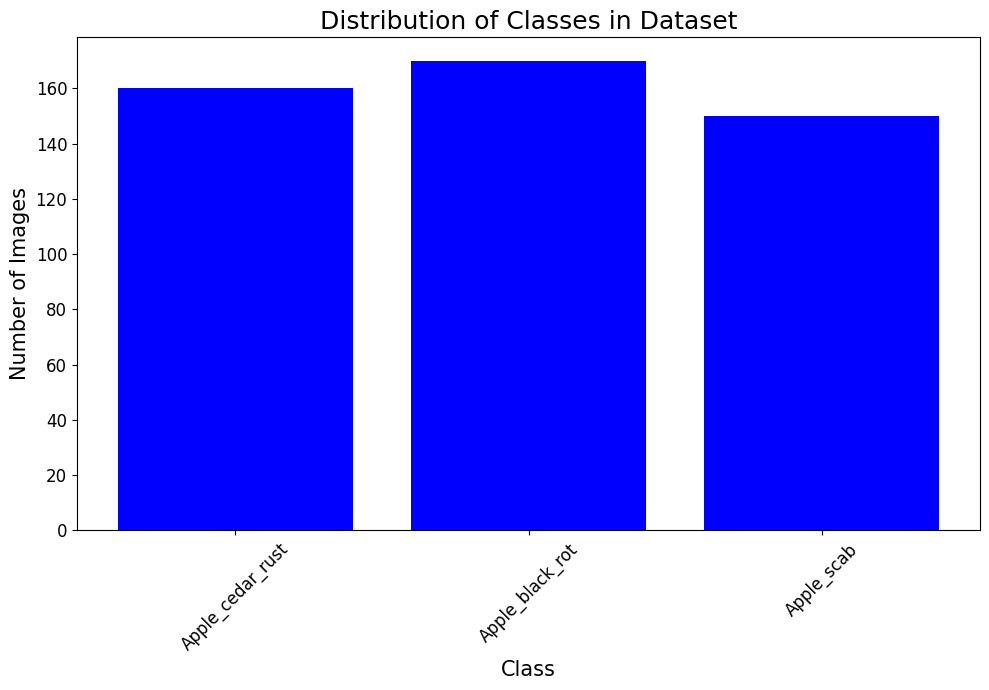

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Example variables (replace with your actual dataset path and class list)
DATASET = "/content/drive/MyDrive/archive (1)"
CLASS_list = ['Apple_cedar_rust','Apple_black_rot','Apple_scab']
base_ds_dist = np.array([len(os.listdir(os.path.join(DATASET, i))) for i in CLASS_list])
plt.figure(figsize=(10, 7))
plt.bar(CLASS_list, base_ds_dist, color='blue')
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of Images', fontsize=15)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)  # Set y-axis tick label size
plt.title('Distribution of Classes in Dataset', fontsize=18)  # Add a title if needed
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [ ]:
for folder in os.listdir(DATASET):
    folder_path = os.path.join(DATASET, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)
            if image is not None:
                height, width, channels = image.shape
                print(f"Image: {filename} - Size: {width}x{height} - Channels: {channels}")
            else:
                print(f"Failed to read image {filename}")

Image: Black_rot (116).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (107).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (110).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (109).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (11).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (108).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (115).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (114).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (113).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (112).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (111).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (105).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (106).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (104).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (101).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (103).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (1).JPG - Size: 256x256 - Channels: 3
Image: Black_rot (102).JPG - Size:

In [ ]:
dataset_path = '/content/drive/MyDrive/archive (1)'
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset directory not found: {dataset_path}")

print("Contents of dataset directory:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

Contents of dataset directory:
archive (1)/
    Apple_black_rot/
        Black_rot (116).JPG
        Black_rot (107).JPG
        Black_rot (110).JPG
        Black_rot (109).JPG
        Black_rot (11).JPG
        Black_rot (108).JPG
        Black_rot (115).JPG
        Black_rot (114).JPG
        Black_rot (113).JPG
        Black_rot (112).JPG
        Black_rot (111).JPG
        Black_rot (105).JPG
        Black_rot (106).JPG
        Black_rot (104).JPG
        Black_rot (101).JPG
        Black_rot (103).JPG
        Black_rot (1).JPG
        Black_rot (102).JPG
        Black_rot (10).JPG
        Black_rot (100).JPG
        Black_rot (136).JPG
        Black_rot (137).JPG
        Black_rot (139).JPG
        Black_rot (135).JPG
        Black_rot (14).JPG
        Black_rot (147).JPG
        Black_rot (140).JPG
        Black_rot (141).JPG
        Black_rot (142).JPG
        Black_rot (143).JPG
        Black_rot (126).JPG
        Black_rot (13).JPG
        Black_rot (130).JPG
        Black_rot

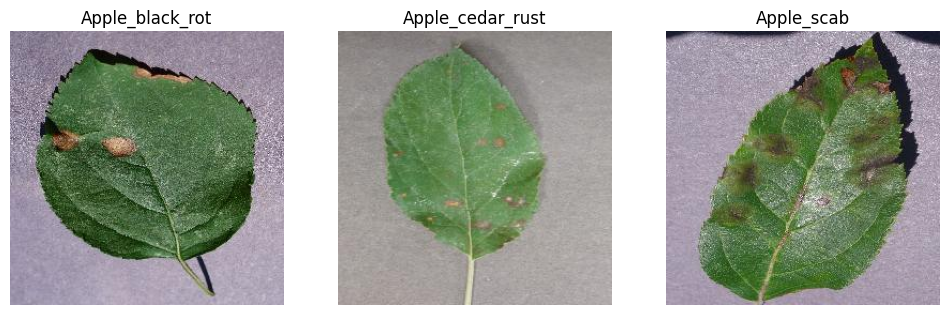

In [ ]:
DATASET = "/content/drive/MyDrive/archive (1)"
# Initialization
plt.figure(figsize=(12, 4))
# List all categories in the dataset directory
categories = os.listdir(DATASET)

for i, category in enumerate(categories):
    category_path = os.path.join(DATASET, category)
    images = os.listdir(category_path)
    random_image_name = random.choice(images)
    image_path = os.path.join(category_path, random_image_name)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(categories), i + 1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.show()

In [ ]:
IMG_SIZE = 224
DATASET = '/content/drive/MyDrive/archive (1)'

In [ ]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB (OpenCV uses BGR by default)
    img = cv2.resize(img, (224, 224))  # Resize image to 224x224
    img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    return img

# Example usage:
image_path = '/content/drive/MyDrive/archive (1)/Apple_black_rot/Black_rot (1).JPG'
preprocessed_img = preprocess_image(image_path)

In [ ]:
def load_data(data_path):
    images = []
    labels = []
    categories = os.listdir(data_path)
    label_dict = {category: i for i, category in enumerate(categories)}

    for category in categories:
        class_path = os.path.join(data_path, category)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label_dict[category])

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_dict

images, labels, label_dict = load_data(DATASET)

In [ ]:
images = images / 255.0

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
batch_size = 32
input_shape = (224, 224, 3)
num_epochs = 1

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

Found 384 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Number of classes: 3


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
base_model = MobileNet(input_shape=(224, 224, 3),#we can specify the inpur shape with this parameter
    include_top=False)
base_model.trainable = False # We freeze the training of the convolutions
base_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

Found 384 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Training iteration 1


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4915 - loss: 2.1804 - val_accuracy: 0.8958 - val_loss: 0.2640
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9727 - loss: 0.1266 - val_accuracy: 0.9792 - val_loss: 0.0560
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 0.9688 - val_loss: 0.0490
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 0.9792 - val_loss: 0.0292
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0233
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9896 - val_loss: 0.0266
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9896 - val_loss: 0.0274
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
Validation Accuracies for 2 iterations: [0.9895833134651184, 0.9895833134651184, 0.9895833134651184, 0.9895833134651184, 1.0]
Mean Validation Accuracy: 0.9916666507720947
Standard Deviation of Validation Accuracy: 0.0041666746139526365


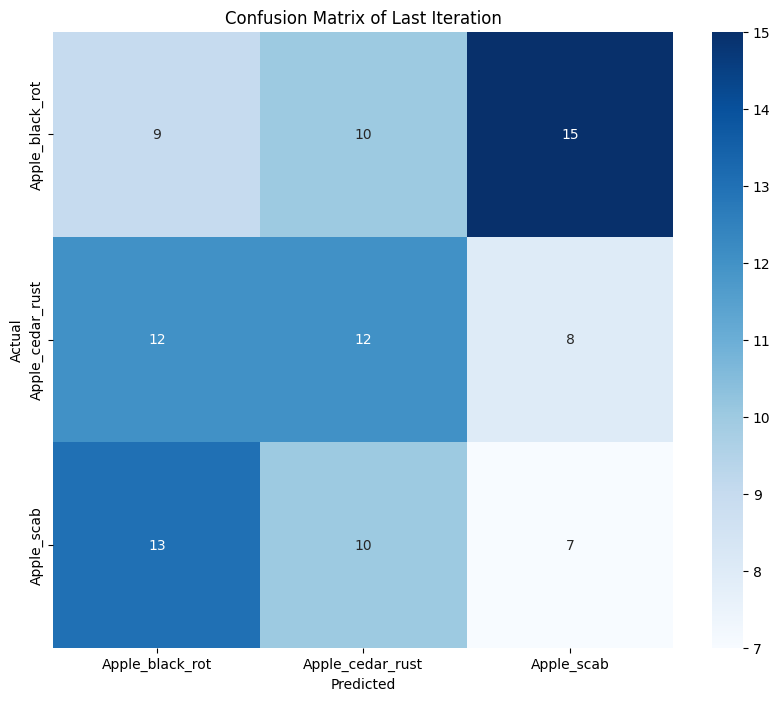

Classification Report of Last Iteration:
                  precision    recall  f1-score   support

 Apple_black_rot       0.26      0.26      0.26        34
Apple_cedar_rust       0.38      0.38      0.38        32
      Apple_scab       0.23      0.23      0.23        30

        accuracy                           0.29        96
       macro avg       0.29      0.29      0.29        96
    weighted avg       0.29      0.29      0.29        96



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.models import Model, load_model
import os

# Set parameters
batch_size = 32
input_shape = (224, 224, 3)
num_epochs = 10

# Load data
DATASET = "/content/drive/MyDrive/archive (1)"
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(DATASET,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(DATASET,
                                                         target_size=(224, 224),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation')

# Function to create the model
def create_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model 5 times and store results
results = []
all_confusion_matrices = []

for i in range(5):
    print(f"Training iteration {i+1}")
    model = create_model()
    history = model.fit(train_generator,
                        epochs=num_epochs,
                        validation_data=validation_generator,
                        verbose=1)
    val_acc = history.history['val_accuracy'][-1]
    results.append(val_acc)
    print(f"Iteration {i+1} Validation Accuracy: {val_acc}")

    # Predict the validation data
    y_val_pred = model.predict(validation_generator)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)
    all_confusion_matrices.append(cm)

# Display results
print("Validation Accuracies for 2 iterations:", results)
print("Mean Validation Accuracy:", np.mean(results))
print("Standard Deviation of Validation Accuracy:", np.std(results))

# Plot confusion matrix of the last iteration
plt.figure(figsize=(10, 8))
sns.heatmap(all_confusion_matrices[-1], annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix of Last Iteration")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Overall classification report for the last iteration
print("Classification Report of Last Iteration:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=list(validation_generator.class_indices.keys())))

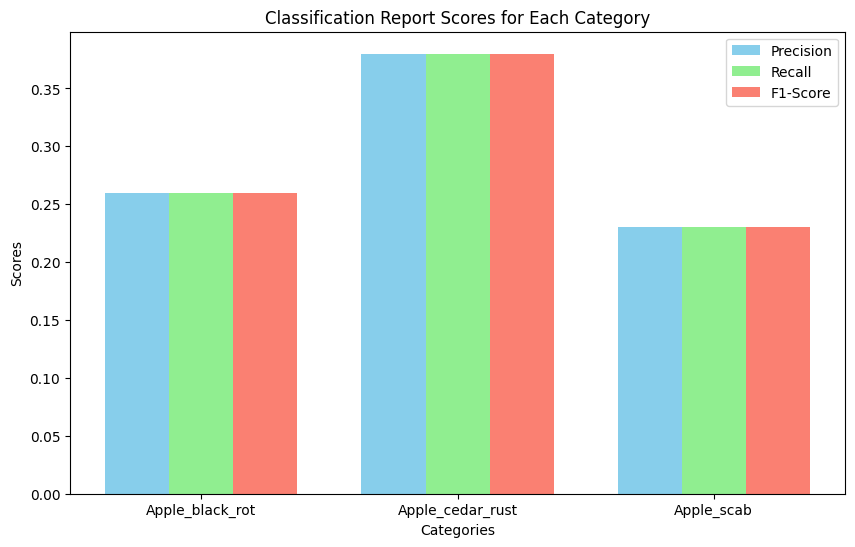

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your classification report
labels = ['Apple_black_rot', 'Apple_cedar_rust', 'Apple_scab']
precision = [0.26, 0.38, 0.23]
recall = [0.26, 0.38, 0.23]
f1_score = [0.26, 0.38, 0.23]

x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='salmon')

# Adding text labels
ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Scores for Each Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()



